# Estimator
- Define a list of feature coluns
- Create the Estimator Model
- Create the Data Input function
- Call train, evaluate, and predict methods

In [1]:
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import matplotlib.pyplot as plt


Instructions for updating:
non-resource variables are not supported in the long term


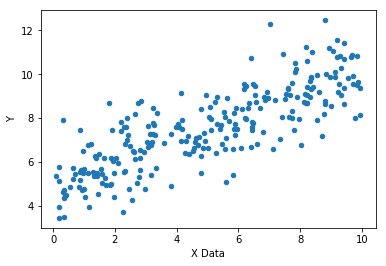

In [2]:
# fake data
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))
y_true = (0.5 * x_data) + 5 + noise
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true,columns=['Y'])

my_data = pd.concat([x_df,y_df],axis=1)
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')

## How to build an Estimator

In [6]:
# step 1: define the feature columns
feat_cols = [ tf.feature_column.numeric_column('x',shape=[1]) ] #a simple n x 1 feature

In [7]:
# step 2: create the estimator model
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpec2hj1zf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe6535cdcf8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [8]:
# step 3.1: prepare the training data
from sklearn.model_selection import train_test_split

# the proper way to split the data into test and training
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3)
print(x_train.shape)
print(x_eval.shape)

(700000,)
(300000,)


In [9]:
# step 3.2: create the input function
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [17]:
# step 4: train
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpec2hj1zf/model.ckpt-1000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into /tmp/tmpec2hj1zf/model.ckpt.
INFO:tensorflow:loss = 2.6725006, step = 1001
INFO:tensorflow:global_step/sec: 528.3
INFO:tensorflow:loss = 6.4823627, step = 1101 (0.193 sec)
INFO:tensorflow:global_step/sec: 774.866
INFO:tensorflow:loss = 7.306028, step = 1201 (0.127 sec)
INFO:tensorflow:global_step/sec: 788.324
INFO:tensorflow:loss = 6.181137, step = 1301 (0.127 sec)
INFO:tensorflow:global_step/sec: 793.31
INFO:tensorflow:loss = 10.828811, step = 1401 (0.126 sec)
INFO:tensorflow:global_step/sec: 780.482
INFO:tensorflow:loss = 7.412271, step = 1501 (0.128 sec)
INFO:

In [18]:
# check the training metrics
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=False)

train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-02T11:34:20Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpec2hj1zf/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-04-02-11:34:22
INFO:tensorflow:Saving dict for global step 2000: average_loss = 1.0075612, global_step = 2000, label/mean = 7.4881196, loss = 8.06049, prediction/mean = 7.421103
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000

In [20]:
# check the test metrics
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=None,shuffle=False)

eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-02T11:34:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpec2hj1zf/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-04-02-11:34:42
INFO:tensorflow:Saving dict for global step 2000: average_loss = 0.99770373, global_step = 2000, label/mean = 7.5245004, loss = 7.98163, prediction/mean = 7.437389
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200

In [21]:
# compare your training and test metrics
# if the loss is significantly greater in the eval data, 
# you are probably overfitting
print(train_metrics)
print(eval_metrics)

{'average_loss': 1.0075612, 'label/mean': 7.4881196, 'loss': 8.06049, 'prediction/mean': 7.421103, 'global_step': 2000}
{'average_loss': 0.99770373, 'label/mean': 7.5245004, 'loss': 7.98163, 'prediction/mean': 7.437389, 'global_step': 2000}


In [23]:
# step 5: ultimately - we can now use our model to evaluate new data
brand_new_data = np.linspace(0,10,10)

input_predict_func = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [25]:
# extract the predictions
predictions = []

for pred in list(estimator.predict(input_predict_func)):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpec2hj1zf/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[array([4.905576], dtype=float32),
 array([5.4660153], dtype=float32),
 array([6.0264544], dtype=float32),
 array([6.5868936], dtype=float32),
 array([7.1473327], dtype=float32),
 array([7.7077713], dtype=float32),
 array([8.26821], dtype=float32),
 array([8.8286495], dtype=float32),
 array([9.38909], dtype=float32),
 array([9.949528], dtype=float32)]

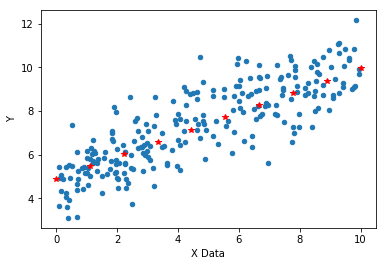

In [27]:
# plot and compare to the actual data
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'*r')